In [1]:
import pandas as pd

df = pd.read_csv("D:/ВУЗ/Атаева/Домашняя Работа/HomeWorkAnalyz/work_1/habr_articles.csv")
df

,Название,Время чтения,Просмотры,Текст,Ключевые слова,Ссылка
0,Анонимные мессенджеры: лучшие решения для конф...,5 мин,Количество просмотров11,В наше время защита приватности и данных чрезв...,"Информационная безопасность*, Мессенджеры*, Ст...",https://habr.com/ru/articles/858902/
1,B2B UX: Информационная архитектура и проектиро...,13 мин,Количество просмотров5,В чём часто заключается проблема стартовой стр...,"Блог компании КОРУС Консалтинг, Анализ и проек...",https://habr.com/ru/companies/korus_consulting...
2,7 продвинутых приемов pandas для науки о данных,4 мин,Количество просмотров73,Pandas — это основная библиотека для работы с ...,"Python*, SQL*, PostgreSQL*, Data Engineering*",https://habr.com/ru/articles/858894/
3,Тестирование BMС: поговорим о нагрузочном тест...,7 мин,Количество просмотров154,"Хабр, привет! Мы в компании Аквариус стремимся...","Блог компании ПК Аквариус, Тестирование IT-сис...",https://habr.com/ru/companies/aquarius/article...
4,Крупные и не очень производители электроники п...,4 мин,Количество просмотров441,Привет! Это Даша Волкова из МТС Диджитал. В ок...,"Блог компании МТС, Производство и разработка э...",https://habr.com/ru/companies/ru_mts/articles/...
...,...,...,...,...,...,...
995,"Когда я вырасту, я стану Системным аналитиком",4 мин,Количество просмотров6K,"Привет, Хабр! Меня зовут Татьяна Ошуркова, я р...",Анализ и проектирование систем*,https://habr.com/ru/articles/853276/
996,"VoWiFi, DIY-свитчи и другие сетевые эксперимен...",4 мин,Количество просмотров2.2K,В предыдущем выпуске сетевого дайджеста мы гов...,"Блог компании VAS Experts, Разработка систем с...",https://habr.com/ru/companies/vasexperts/artic...
997,Программирование для детей 14 лет: направления...,6 мин,Количество просмотров3.6K,"14 лет – возраст, в котором можно изучать прог...","Блог компании Пиксель, Учебный процесс в IT, П...",https://habr.com/ru/companies/pixel_study/arti...
998,Предлагаю сделать интернациональный форк ядра ...,4 мин,Количество просмотров31K,"Приветствую, всех!","Настройка Linux*, Open source*, Разработка под...",https://habr.com/ru/articles/853270/


# Часть А


#### Целевая перемнная Программирование и Информационная безопастность

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slyexistence\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Классификационный отчет:
                             precision    recall  f1-score   support

                      Блоги       0.65      0.70      0.67        91
                     Другое       0.59      0.68      0.63        85
Информационная безопасность       0.00      0.00      0.00         8
           Программирование       0.00      0.00      0.00        14

                   accuracy                           0.62       198
                  macro avg       0.31      0.35      0.33       198
               weighted avg       0.55      0.62      0.58       198



c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Slyexistence\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

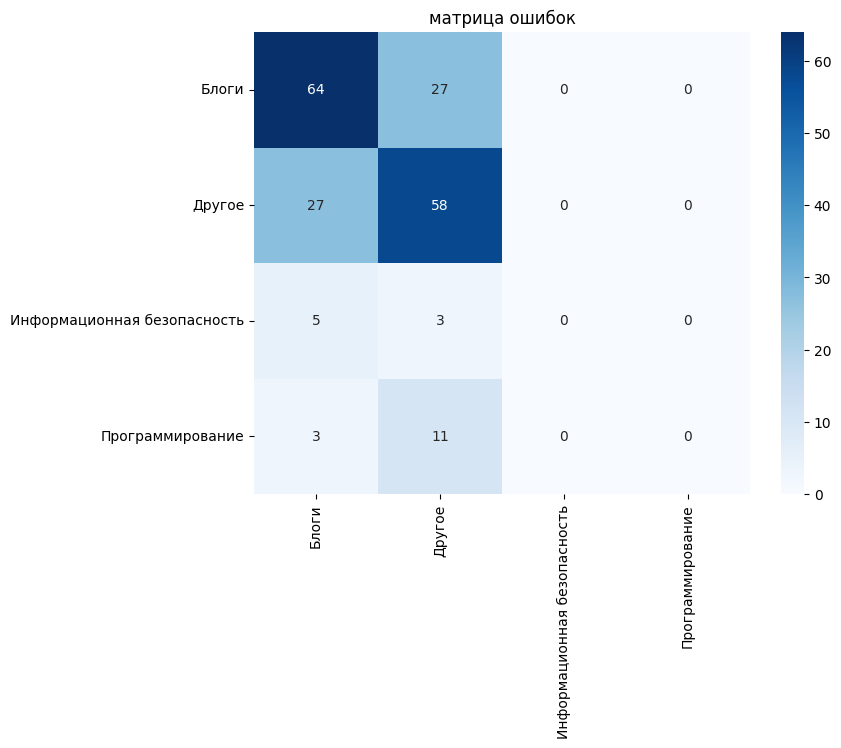

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

data = pd.read_csv("D:/ВУЗ/Атаева/Домашняя Работа/HomeWorkAnalyz/work_1/habr_articles.csv")
data = data.dropna(subset=["Текст"])  # Удаление строк без текста

def simplify_topic(topic):
    if "Python" in topic or "Программирование" in topic:
        return "Программирование"
    elif "Информационная безопасность" in topic:
        return "Информационная безопасность"
    elif "Блог компании" in topic:
        return "Блоги"
    else:
        return "Другое"

data["Тематика"] = data["Ключевые слова"].str.split(',').str[0].str.strip()
data["Тематика"] = data["Тематика"].apply(simplify_topic)


vectorizer = TfidfVectorizer(max_features=5000, stop_words=russian_stopwords)
X = vectorizer.fit_transform(data["Текст"])

encoder = LabelEncoder()
y = encoder.fit_transform(data["Тематика"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Классификационный отчет:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap="Blues")
plt.title("матрица ошибок")
plt.show()


# Изменил целевую переменную на Блоги и другое, так как их больше

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slyexistence\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Классификационный отчет:
              precision    recall  f1-score   support

      Другое       0.67      0.85      0.75       107
       Блоги       0.74      0.51      0.60        91

    accuracy                           0.69       198
   macro avg       0.71      0.68      0.68       198
weighted avg       0.70      0.69      0.68       198



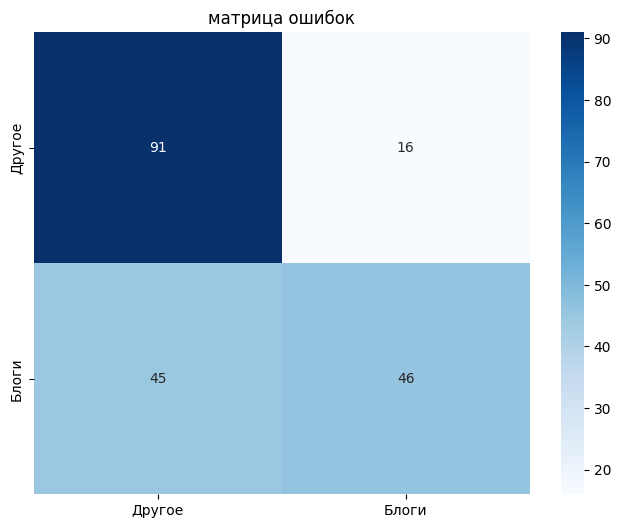

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
russian_stopwords = stopwords.words('russian')

data = pd.read_csv("D:/ВУЗ/Атаева/Домашняя Работа/HomeWorkAnalyz/work_1/habr_articles.csv")
data = data.dropna(subset=["Текст"]) 

def simplify_topic(topic):
    if "Блог компании" in topic:
        return "Блоги"
    else:
        return "Другое"

data["Тематика"] = data["Ключевые слова"].str.split(',').str[0].str.strip()
data["Тематика"] = data["Тематика"].apply(simplify_topic)
data = data[data["Тематика"].isin(["Блоги", "Другое"])]

vectorizer = TfidfVectorizer(max_features=5000, stop_words=russian_stopwords)
X = vectorizer.fit_transform(data["Текст"])

data["Тематика"] = data["Тематика"].map({"Блоги": 1, "Другое": 0})  # 1 - Блоги, 0 - Другое
y = data["Тематика"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Классификационный отчет:")
print(classification_report(y_test, y_pred, target_names=["Другое", "Блоги"]))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=["Другое", "Блоги"], yticklabels=["Другое", "Блоги"], cmap="Blues")
plt.title("матрица ошибок")
plt.show()
